In [13]:
import pandas as pd
import numpy as np 
from pylab import plt
from scipy.optimize import curve_fit
from scipy.stats import lognorm, kstest

df = pd.read_excel('/Users/ananth/Desktop/salinity_snowdepth.xlsx');

a = df.to_numpy()

In [3]:
df
salinity = df.Sp
snow_depth = df.Snow_depth

# Plot salinity vs snow depth from frey et al 2020 and confer et al 2023

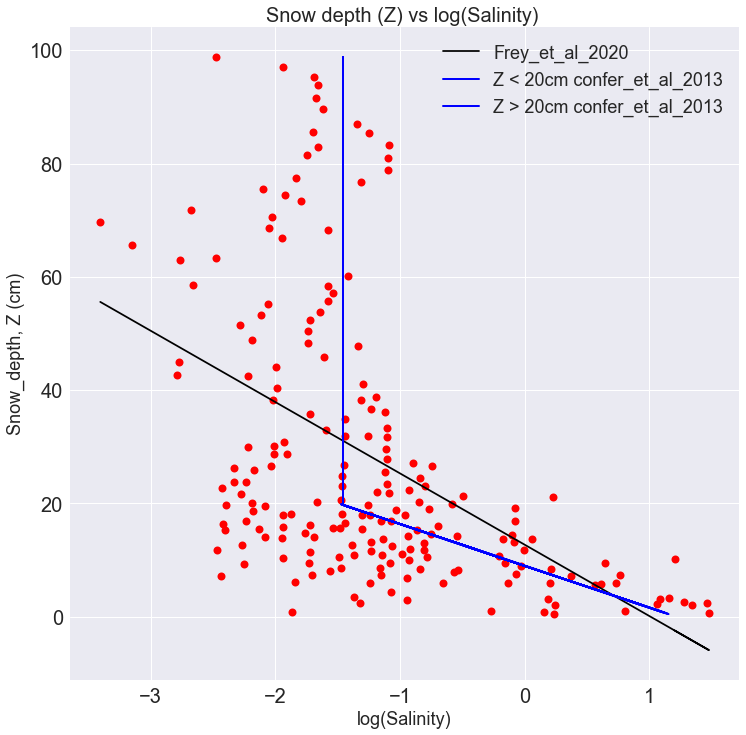

In [4]:
plt.figure(figsize=(12,12))
plt.style.use('seaborn')

sd_slice1 = snow_depth[snow_depth<20]
sd_slice2 = snow_depth[snow_depth>=20]

sp_slice1 = salinity[snow_depth<20]
sp_slice2 = salinity[snow_depth>20]

plt.plot(np.log10(salinity),snow_depth,'r.',markersize = 16)

linear_fit = np.polyfit(np.log10(salinity),snow_depth,1)
Y_fit = np.polyval(linear_fit,np.log10(salinity))
#plt.plot(np.log10(salinity),func_1(salinity,*popt),'k.')
plt.plot(np.log10(salinity),Y_fit,'k-', label = 'Frey_et_al_2020')
#plt.xscale('log')
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
plt.title('Snow depth (Z) vs log(Salinity) ',fontsize = 20)
plt.xlabel('log(Salinity)',fontsize = 18)
plt.ylabel('Snow_depth, Z (cm)',fontsize = 18)

# inserting parametrisation from confer et al 2013

sp_confer_1 = 16.47 * np.exp(-0.312*sd_slice1) # z between 0 and 20 cm 
sp_confer_2 = np.array([0.035]*len(sd_slice2)) # for z >20 cm

plt.plot(np.log10(sp_confer_1), sd_slice1, 'b-', linewidth = 2, label = 'Z < 20cm confer_et_al_2013')
plt.plot(np.log10(sp_confer_2), sd_slice2, 'b-', linewidth = 2, label = 'Z > 20cm confer_et_al_2013')
plt.legend(fontsize = 18)



Snow depth bin:  80  to  90
mean =  4970124.933277006
(8,) (8,)


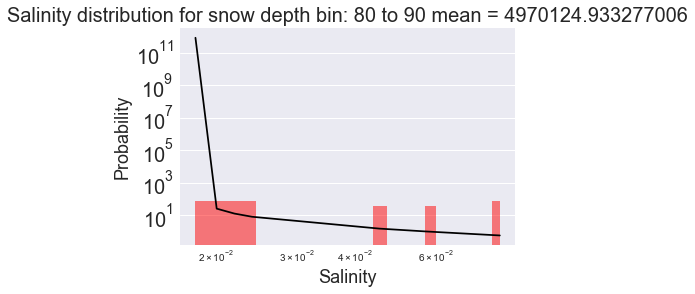

In [9]:
# for each snow depth bin, calculate the salinity distribution

depth_bins = np.arange(0,100,10)
depth_bins = [80, 90]


for i in range(len(depth_bins)-1):
    print('Snow depth bin: ', depth_bins[i], ' to ', depth_bins[i+1])
    salinity_slice = salinity[(snow_depth>=depth_bins[i]) & (snow_depth<depth_bins[i+1])]
    # plot the distrbution of the salinity slice as a smooth curve
    shape, loc, scale = lognorm.fit(salinity_slice)
    # Mean of the log-normal distribution
    mean = np.exp(loc + shape**2/2) * scale 
    print('mean = ', mean)
    plt.figure(figsize=(6,4))
    plt.style.use('seaborn')
    pdf = lognorm.pdf(salinity_slice, shape, loc, scale)
    #plt.hist(b, bins=20, density=True, alpha=0.5, label='Data')
    plt.hist(salinity_slice, bins = 20, density = True, color = 'r', alpha = 0.5, label = 'Data')
    #pdf_sorted = np.sort(pdf)
    sorted_indices = np.argsort(salinity_slice)

    print(pdf.shape, salinity_slice.shape)
    pdf_sorted = pdf[sorted_indices]
    #pdf_sorted.shape
    salinity_sorted = np.sort(salinity_slice)


    plt.plot(salinity_sorted, pdf_sorted, 'k-', label='Lognormal Distribution')

    #plt.plot(salinity_slice, pdf, 'k-', label='Lognormal Distribution')
       
    plt.title('Salinity distribution for snow depth bin: '+str(depth_bins[i])+' to '+str(depth_bins[i+1])+f' mean = {mean}',fontsize = 20)
    plt.xlabel('Salinity',fontsize = 18)
    plt.ylabel('Probability',fontsize = 18)
    plt.yscale('log')
    plt.xscale('log')
    plt.xticks(fontsize = 20)
    plt.yticks(fontsize = 20)
    plt.show()

In [15]:
from scipy.stats import lognorm
# Create an array 'b' with data of length 100
b = np.random.lognormal(mean=1, sigma=0.5, size=100)

# Fit a lognormal distribution to the data in 'b'
shape, loc, scale = lognorm.fit(b)


In [16]:
5//2

2

In [64]:
import numpy as np 
a = np.array([[1 ,3, 4, 4],[45,65,78,5]])
cal = a.sum(axis = 0)
x = a/cal
print('cal1 = ', cal.shape)
cal.reshape(1,4)
y = a/cal
print('cal2 = ', cal.shape)


cal1 =  (4,)
cal2 =  (4,)


In [65]:
x

array([[0.02173913, 0.04411765, 0.04878049, 0.44444444],
       [0.97826087, 0.95588235, 0.95121951, 0.55555556]])

In [66]:
y

array([[0.02173913, 0.04411765, 0.04878049, 0.44444444],
       [0.97826087, 0.95588235, 0.95121951, 0.55555556]])

In [67]:
x-y

array([[0., 0., 0., 0.],
       [0., 0., 0., 0.]])

Snow depth bin:  0  to  10
The fit is not a good fit, p value =  4.6375594453659795e-182
Snow depth bin:  10  to  20
The fit is not a good fit, p value =  0.0
Snow depth bin:  20  to  30
The fit is not a good fit, p value =  0.0
Snow depth bin:  30  to  40
The fit is not a good fit, p value =  0.0
Snow depth bin:  40  to  50
The fit is not a good fit, p value =  0.0
Snow depth bin:  50  to  60
The fit is not a good fit, p value =  0.0
Snow depth bin:  60  to  70
The fit is not a good fit, p value =  0.0
Snow depth bin:  70  to  80
The fit is not a good fit, p value =  0.0
Snow depth bin:  80  to  90
The fit is not a good fit, p value =  0.0
Snow depth bin:  90  to  100
The fit is not a good fit, p value =  0.0


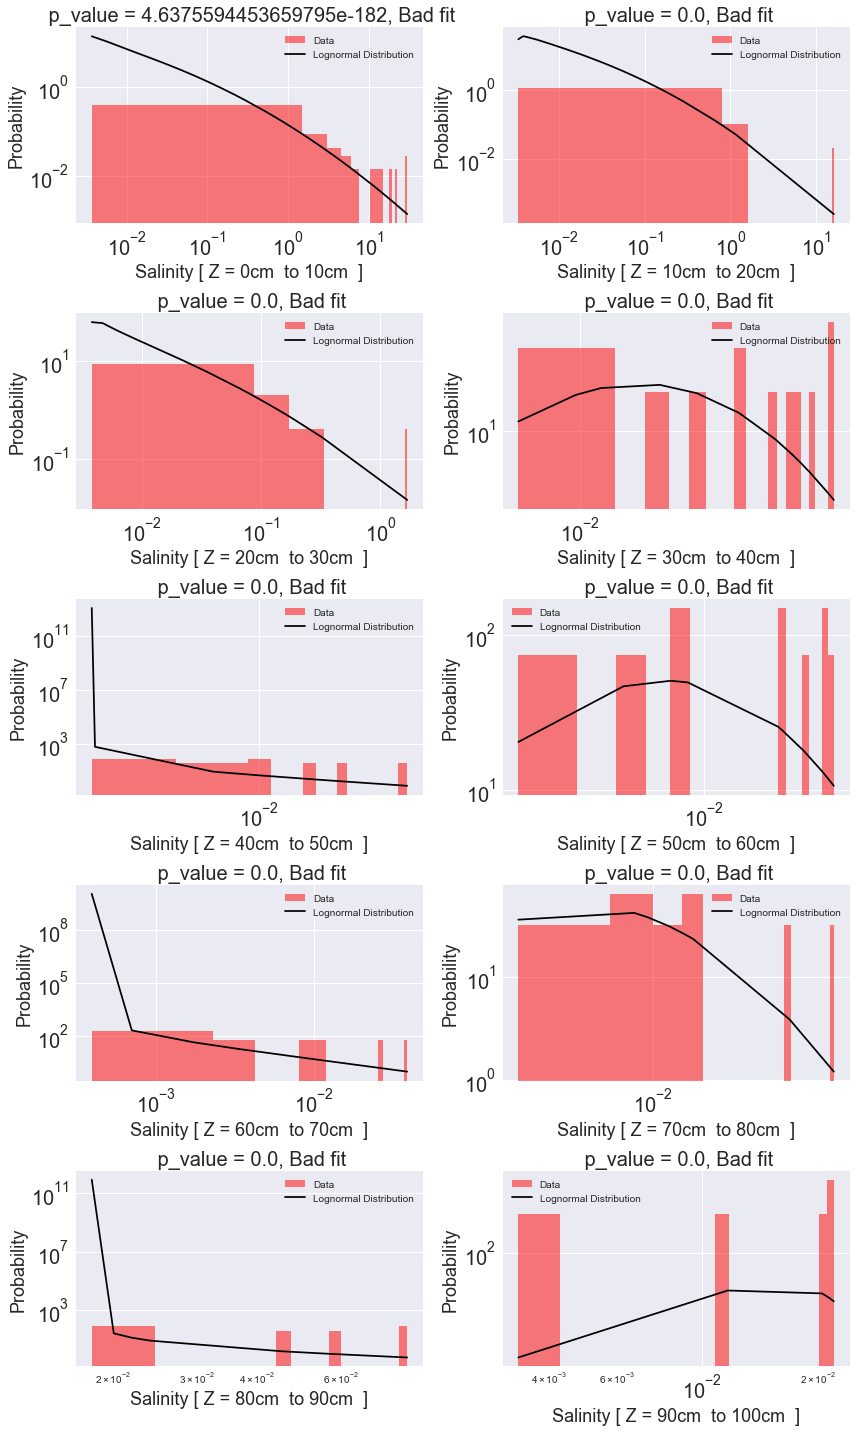

In [20]:
depth_bins = np.arange(0,110,10)
#depth_bins = [20, 40]

num_plots = len(depth_bins) - 1
num_cols = 2
num_rows = np.ceil(num_plots/num_cols).astype(int)

fig, ax = plt.subplots(num_rows, num_cols, figsize=(6*num_cols, 4*num_rows))
plt.style.use('seaborn')

for i in range(num_plots):
    print('Snow depth bin: ', depth_bins[i], ' to ', depth_bins[i+1])
    salinity_slice = salinity[(snow_depth >= depth_bins[i]) & (snow_depth < depth_bins[i+1])]

    params = lognorm.fit(salinity_slice)

    shape = params[0]
    loc   = params[1]
    scale = params[2]

    # kolmogo-smirnov test
    _, p_value = kstest(data, "lognorm", args=params)
    flag = ''
    if p_value > 0.05:
        flag = 'good fit'
        print('The fit is a good fit, p value = ', p_value)
    else:
        flag = 'Bad fit'
        print('The fit is not a good fit, p value = ', p_value)

    
    # mean of the distribution
    mean_1 = np.exp(loc + shape**2/2) * scale 
    # standard deviation of the distribution
    std_1 = np.sqrt(np.exp(shape**2) - 1) * mean_1
   


    #val_str = f'shape = {round(shape,4)}, loc =  {round(loc,4)},  scale = {round(scale,4)}'
    val_str = f'mean = {round(mean_1,4)}, std =  {round(std_1,4)}, p_value = {round(p_value,3)}, {flag}'
    val_str = f' p_value = {p_value}, {flag}'
    
    z_bin = f' [ Z = {depth_bins[i]}cm  to {depth_bins[i+1]}cm  ]'
    pdf = lognorm.pdf(salinity_slice, shape, loc, scale)

    sorted_indices = np.argsort(salinity_slice)
    pdf_sorted = pdf[sorted_indices]
    salinity_sorted = np.sort(salinity_slice)
    
    row = i//num_cols
    col = i%num_cols
    ax[row, col].hist(salinity_slice, bins=20, density=True, color='r', alpha=0.5, label='Data')
    ax[row, col].plot(salinity_sorted, pdf_sorted, 'k-', label='Lognormal Distribution')
    #ax[row, col].set_title('Snow depth bin: [ '+str(depth_bins[i])+' to '+str(depth_bins[i+1])+' ]', fontsize=20)
    ax[row, col].set_title(val_str, fontsize=20)
    ax[row, col].set_xlabel('Salinity'+ z_bin, fontsize=18)
    ax[row, col].set_ylabel('Probability', fontsize=18)
    ax[row, col].set_xscale('log')
    ax[row, col].set_yscale('log')
    ax[row, col].tick_params(axis='both', which='major', labelsize=20)
    ax[row,col].legend()

plt.tight_layout()
plt.legend()
plt.show()


In [10]:
import numpy as np
from scipy.stats import lognorm, kstest

# Generate some data from a log-normal distribution
data = lognorm.rvs(0.5, loc=0, scale=1, size=1000)

# Fit the data to a log-normal distribution using lognorm.fit
params = lognorm.fit(data)

# Perform the K-S test to compare the data and the fitted distribution
_, p_value = kstest(data, "lognorm", args=params)

# Check if the p-value is greater than the significance level (e.g., 0.05)
if p_value > 0.05:
    print("The fit is considered good.")
else:
    print("The fit is considered not good.")


The fit is considered good.


In [11]:
params

(0.4683225388760527, -0.06266239175937954, 1.048769476574193)